Load the dataset into python environment and do the following
1. Handle the Missing values
2. Outlier Detection
3. Scaling
4. Encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("diamonds_new.csv")
df

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [4]:
DF=df.copy()

In [5]:
df.shape

(53940, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


### INSIGHT
*Missing values are there in the dataset

In [7]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [8]:
df.tail()

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [9]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


#INSIGHT
* In column x,y,z the minimum values are 0 .those will be a noise is the data since they are the measurements of the dimension of the diamond

In [10]:
df['x'] = df['x'].mask(df['x'] == 0).fillna(df.groupby(["cut",'color','clarity'])['x'].transform('median'))
df['y'] = df['y'].mask(df['y'] == 0).fillna(df.groupby(["cut",'color','clarity'])['y'].transform('median'))
df['z'] = df['z'].mask(df['z'] == 0).fillna(df.groupby(["cut",'color','clarity'])['z'].transform('median'))

In [11]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.732043,5.735298,3.540185,1966.399861
std,0.474428,2.235742,1.119613,1.140289,0.702564,1994.719869
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


# EDA

In [12]:
duplicated_df=df[df.duplicated()]
duplicated_df

,carat,cut,color,clarity,table,x,y,z,price_new
1005,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1006,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1007,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1008,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
2025,1.52,Good,E,I1,58.0,7.53,7.42,4.28,1552.5
...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,55.0,5.19,5.16,3.20,959.5
49326,0.51,Ideal,F,VVS2,56.0,5.17,5.19,3.17,1046.5
49557,0.71,Good,F,SI2,60.0,6.32,6.34,3.93,1065.0
50079,0.51,Ideal,F,VVS2,56.0,5.19,5.17,3.17,1101.5


### INSIGHT
*148 rows are duplicates.So we can drop those duplicate rows.

In [13]:
df=df.drop_duplicates()
df.shape

(53792, 9)

In [14]:
df=df.reset_index()   #since the duplicate rows are dropped. 

In [15]:
df

,index,carat,cut,color,clarity,table,x,y,z,price_new
0,0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...,...
53787,53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53788,53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53789,53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53790,53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [16]:
df.shape

(53792, 10)

In [17]:
df=df.drop('index',axis=1)
df.shape

(53792, 9)

In [18]:
df

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53787,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53788,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53789,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53790,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [19]:
df.value_counts("cut")       #checking for the presence of noise in the coulmns

cut
Ideal        21487
Premium      13747
Very Good    12069
Good          4891
Fair          1598
dtype: int64

In [20]:
df.value_counts("color")

color
G    11205
E     9776
F     9519
H     8272
D     6755
I     5407
J     2802
dtype: int64

In [21]:
df.value_counts("clarity")

clarity
SI1     13032
VS2     12229
SI2      9149
VS1      8155
VVS2     5056
VVS1     3647
IF       1784
I1        740
dtype: int64

# Handling Missing values


In [22]:
df.isnull().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

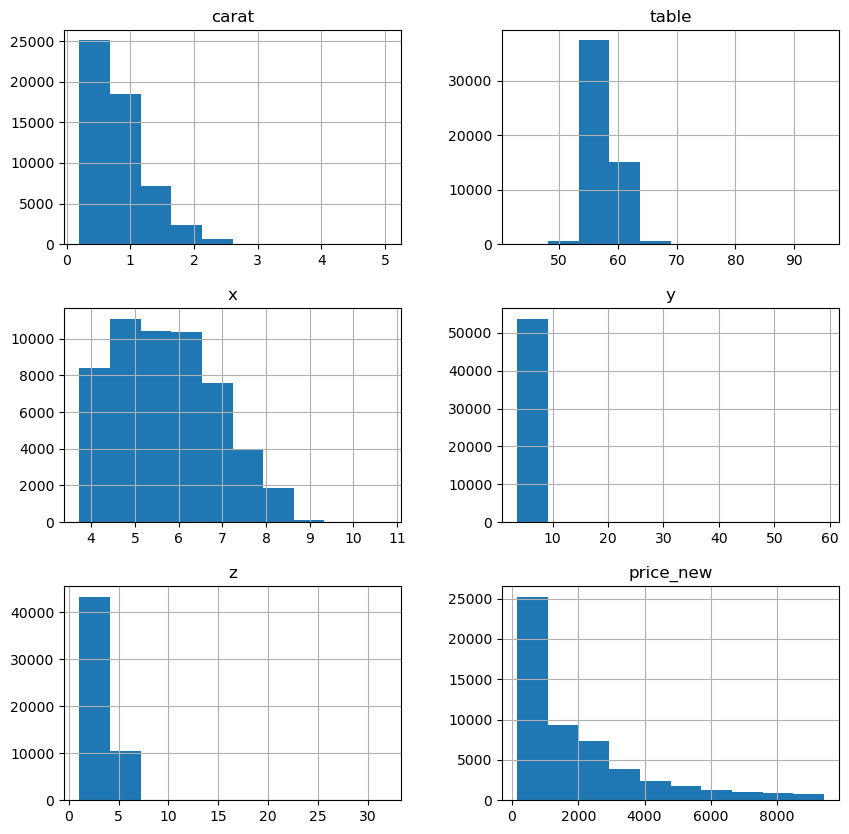

In [23]:
df.hist(figsize=(10,10))
plt.show()

### INSIGHT
* Most of the features are not normally distributed so the missing values are to be filled by median.

In [24]:
df.groupby(["cut",'color','clarity'])[['table','x','y','z','price_new']].median()

table      x      y      z  price_new
cut       color clarity                                       
Fair      D     I1        56.5  7.325  7.205  4.700    2769.25
                IF        57.0  4.680  4.730  2.880     720.00
                SI1       58.5  6.080  6.035  3.930    1950.00
                SI2       58.0  6.130  6.055  3.985    1736.50
                VS1       59.0  5.560  5.580  3.660    1373.50
...                        ...    ...    ...    ...        ...
Very Good J     SI2       59.0  6.795  6.835  4.240    2170.50
                VS1       58.0  6.190  6.230  3.870    1682.50
                VS2       58.0  6.560  6.625  4.085    2109.50
                VVS1      58.0  5.700  5.770  3.500    1046.50
                VVS2      58.0  6.860  6.920  4.220    2832.50

[276 rows x 5 columns]

In [25]:
for i in ['carat','table']:
    df[i].fillna(df.groupby(["cut",'color','clarity'])[i].transform('median'), inplace = True)


#missing values in column 'color' is filled with mode

In [26]:
df['color'].mode()

0    G
Name: color, dtype: object

In [27]:
df['color']=df['color'].fillna('G')

In [28]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# Handling Outliers

<Figure size 1500x2500 with 0 Axes>

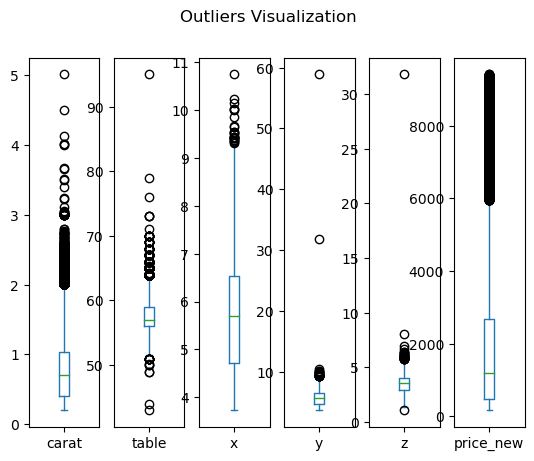

In [29]:
plt.figure(figsize=(15,25))
df.plot(kind="box",layout=(1,6),subplots=True,title="Outliers Visualization")
plt.show()

### INSIGHT
* All the quatitative columns are having outliers

<AxesSubplot:xlabel='carat'>

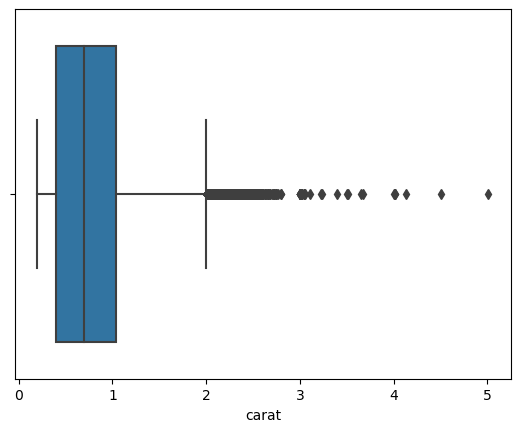

In [30]:
sns.boxplot(df['carat'])

In [31]:
df['sqrt_carat']=df['carat']**0.5
df

,carat,cut,color,clarity,table,x,y,z,price_new,sqrt_carat
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0.479583
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776
...,...,...,...,...,...,...,...,...,...,...
53787,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528
53788,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528
53789,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660
53790,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362


In [32]:
df['sqrt_carat'].skew()

0.5458953333004057

In [33]:
df['carat'].skew()

1.1126898592460808

In [34]:
df['carat'].kurtosis()

1.2437970846307764

In [35]:
df['sqrt_carat'].kurtosis()

-0.4375413473319578

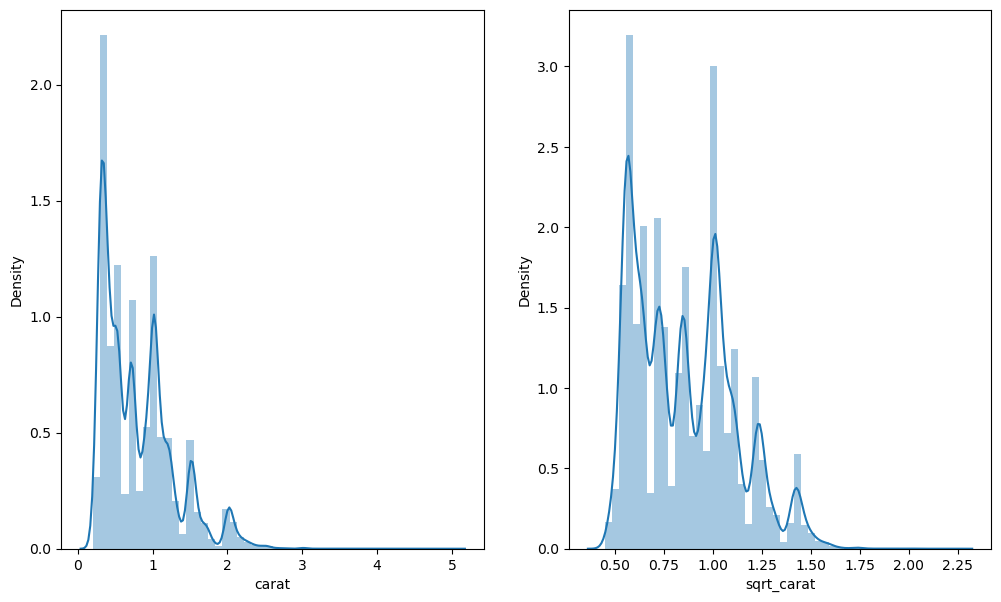

In [36]:
fig,axes=plt.subplots(1,2, figsize=(12,7))
sns.distplot(df['carat'],ax=axes[0])
sns.distplot(df['sqrt_carat'],ax=axes[1])
plt.show()

In [37]:
np.log(df['carat'])

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53787   -0.328504
53788   -0.328504
53789   -0.356675
53790   -0.150823
53791   -0.287682
Name: carat, Length: 53792, dtype: float64

#using capping, IQR

In [43]:
Q1=np.percentile(df['carat'],25,interpolation='midpoint')
Q3=np.percentile(df['carat'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l1=[]
for i in df['carat']:
    if (i>Max)or(i<Min):
        l1.append(i)
len(l1)

-0.5599999999999999 2.0


1873

In [44]:
for i in df['carat']:
    if (i<Min)or(i>Max):
        df['carat'].replace(i,df['carat'].median(),inplace=True)

<AxesSubplot:xlabel='carat'>

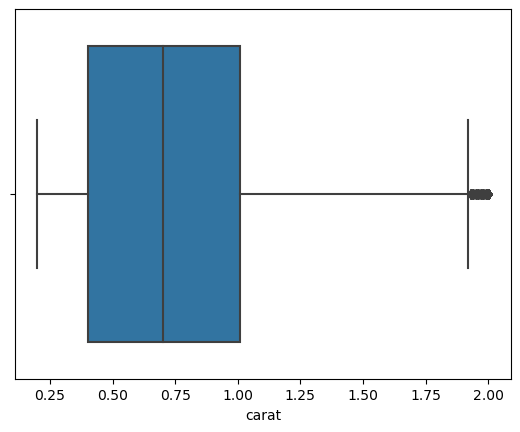

In [45]:
sns.boxplot(df['carat'])

# table

<AxesSubplot:xlabel='table'>

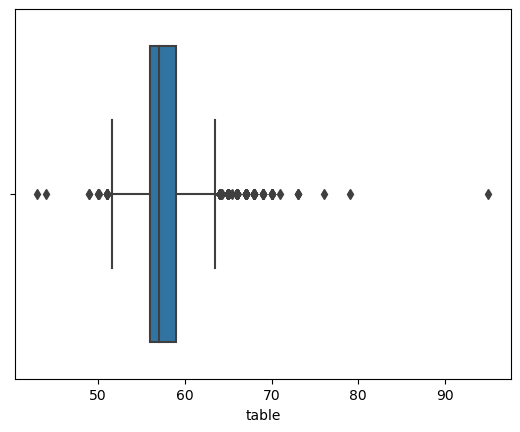

In [46]:
sns.boxplot(df['table'])

In [47]:
Q1=np.percentile(df['table'],25,interpolation='midpoint')
Q3=np.percentile(df['table'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l2=[]
for i in df['table']:
    if (i>Max)or(i<Min):
        l2.append(i)
len(l2)

51.5 63.5


604

In [48]:
for i in df['table']:
    if (i<Min)or(i>Max):
        df['table'].replace(i,df['table'].median(),inplace=True)

<AxesSubplot:xlabel='table'>

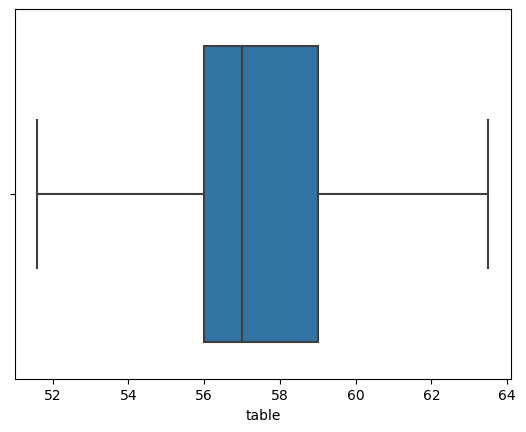

In [49]:
sns.boxplot(df['table'])

# x

<AxesSubplot:xlabel='x'>

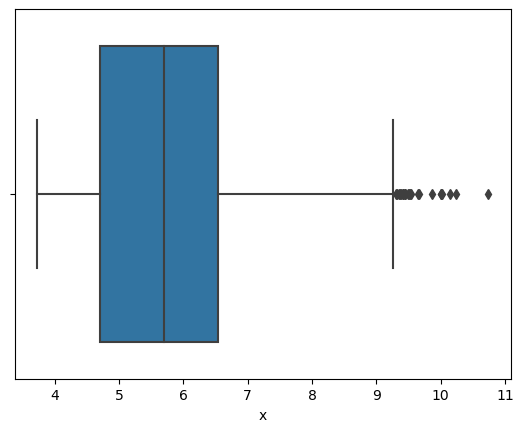

In [50]:
sns.boxplot(df['x'])

In [51]:
Q1=np.percentile(df['x'],25,interpolation='midpoint')
Q3=np.percentile(df['x'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l3=[]
for i in df['x']:
    if (i>Max)or(i<Min):
        l3.append(i)
len(l3)

1.9649999999999999 9.285


24

In [52]:
for i in df['x']:
    if (i<Min)or(i>Max):
        df['x'].replace(i,df['x'].median(),inplace=True)

<AxesSubplot:xlabel='x'>

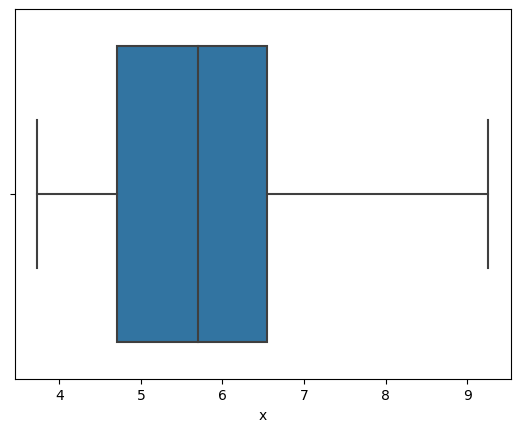

In [53]:
sns.boxplot(df['x'])

# y

<AxesSubplot:xlabel='y'>

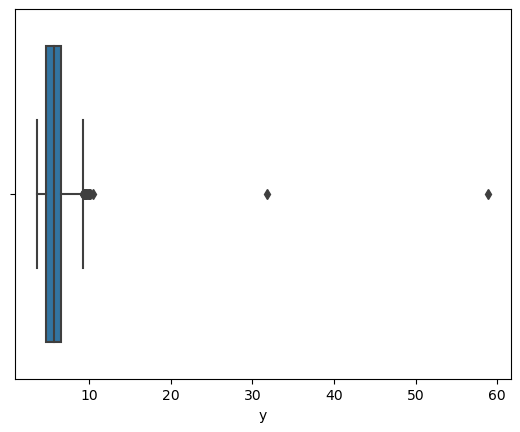

In [54]:
sns.boxplot(df['y'])

In [55]:
Q1=np.percentile(df['y'],25,interpolation='midpoint')
Q3=np.percentile(df['y'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l4=[]
for i in df['y']:
    if (i>Max)or(i<Min):
        l4.append(i)
len(l4)

1.9899999999999993 9.27


22

In [56]:
for i in df['y']:
    if (i<Min)or(i>Max):
        df['y'].replace(i,df['y'].median(),inplace=True)

<AxesSubplot:xlabel='y'>

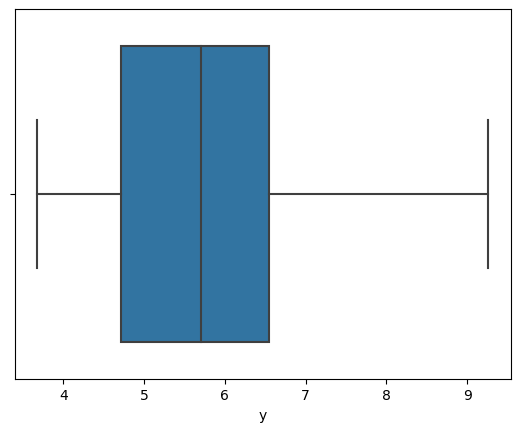

In [57]:
sns.boxplot(df['y'])

# z

<AxesSubplot:xlabel='z'>

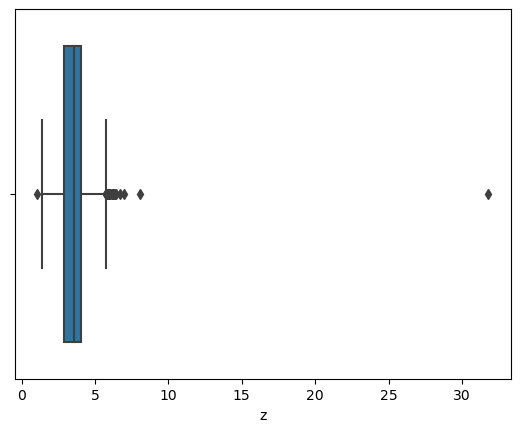

In [58]:
sns.boxplot(df['z'])

In [59]:
Q1=np.percentile(df['z'],25,interpolation='midpoint')
Q3=np.percentile(df['z'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l5=[]
for i in df['z']:
    if (i>Max)or(i<Min):
        l5.append(i)
len(l5)

1.2150000000000003 5.734999999999999


27

In [60]:
for i in df['z']:
    if (i<Min)or(i>Max):
        df['z'].replace(i,df['z'].median(),inplace=True)

<AxesSubplot:xlabel='z'>

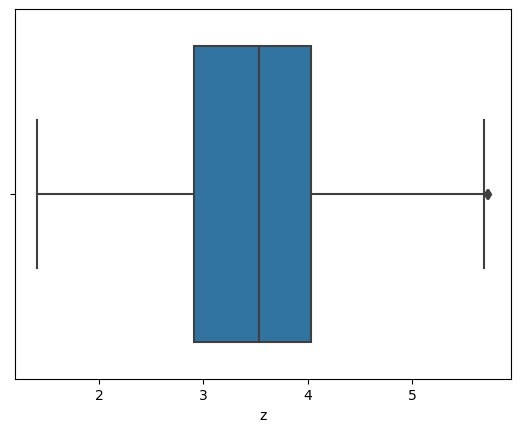

In [61]:
sns.boxplot(df['z'])

In [62]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,sqrt_carat
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258
2,0.23,Good,E,VS1,57.0,4.05,4.07,2.31,163.5,0.479583
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776
...,...,...,...,...,...,...,...,...,...,...
53787,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528
53788,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528
53789,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660
53790,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362


## ENCODING

In [63]:
dict1 = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df=df.replace({"color": dict1})
dict2 = {'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7,"I1":8}
df=df.replace({"clarity": dict2})
dict3 = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
df=df.replace({"cut":dict3})

In [64]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,sqrt_carat
0,0.23,1,6,7,55.0,3.95,3.98,2.43,163.0,0.479583
1,0.21,2,6,6,61.0,3.89,3.84,2.31,163.0,0.458258
2,0.23,4,6,4,57.0,4.05,4.07,2.31,163.5,0.479583
3,0.29,2,2,5,58.0,4.20,4.23,2.63,167.0,0.538516
4,0.31,4,1,7,58.0,4.34,4.35,2.75,167.5,0.556776
...,...,...,...,...,...,...,...,...,...,...
53787,0.72,1,7,6,57.0,5.75,5.76,3.50,1378.5,0.848528
53788,0.72,4,7,6,55.0,5.69,5.75,3.61,1378.5,0.848528
53789,0.70,3,7,6,60.0,5.66,5.68,3.56,1378.5,0.836660
53790,0.86,2,3,7,58.0,6.15,6.12,3.74,1378.5,0.927362


## SCALING

In [65]:
#split the data
y = df['price_new']
x = df.drop('price_new', axis=1)

In [66]:
#split it into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)